<a href="https://colab.research.google.com/github/Swetha126/Linear-Regression/blob/main/GPA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
#Load the dataset
data= pd.read_csv("data.csv")

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [5]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [6]:
data.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


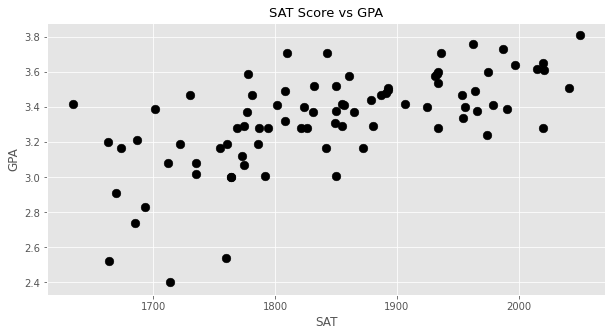

In [7]:
# Plotting the distribution of Data
plt.figure(figsize=(10,5))
plt.title('SAT Score vs GPA', fontsize=13)
plt.xlabel('SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.scatter(data.SAT, data.GPA, s=75, color='black')
plt.show()

In [8]:
#Training
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [10]:
print(f'X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}')

X_train: (75, 1)
X_test: (9, 1)
y_train: (75,)
y_test: (9,)


In [11]:
# Modeling & Fitting 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(f'Coefficients: {model.coef_}')
print(f'Intercepts: {model.intercept_}')

Coefficients: [0.00174641]
Intercepts: 0.10038821971624712


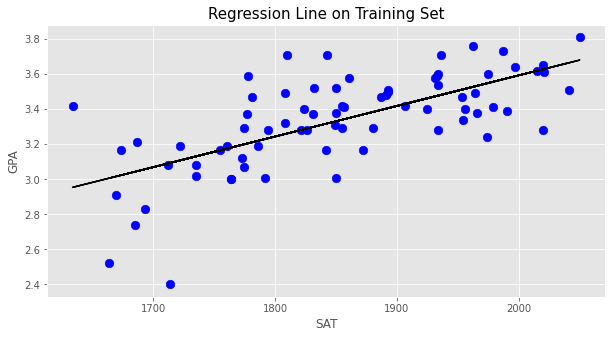

In [13]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Training Set', fontsize=15)
plt.scatter(X_train, y_train, s=75, color='blue')
plt.plot(X_train, model.predict(X_train), color='black')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [14]:
#Visualize test set results
y_pred = np.round(model.predict(X_test), decimals=2)
pd.DataFrame({'SAT Score': X_test[:, 0], 'Actual GPA': y_test, 'Predicted GPA': y_pred})

,SAT Score,Actual GPA,Predicted GPA
0,1769,3.28,3.19
1,1865,3.37,3.36
2,1702,3.39,3.07
3,1802,3.41,3.25
4,1663,3.20,3.00
5,1879,3.44,3.38
6,1760,2.54,3.17
7,1730,3.47,3.12
8,1787,3.28,3.22


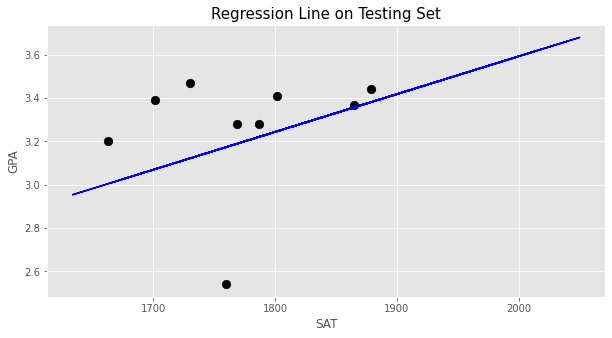

In [15]:
plt.figure(figsize=(10,5))
plt.title('Regression Line on Testing Set', fontsize=15)
plt.scatter(X_test, y_test, s=75, color='black')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [16]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error(MAE): 0.20888888888888893
